# Exploratory Data Analysis (EDA) of Predicting Used Car Prices

### 1. Setup and Data Loading

**Objective**

The primary objective of this notebook is to develop and document a robust machine learning model to accurately predict the price of used cars. This involves a comprehensive process of data cleaning, feature engineering.We'll create visualizations to understand the data's characteristics, see how different features relate to price, and identify any outliers or strange patterns.This will set us up with a clean, well-understood dataset, ready for modeling.

**Business Importance**

- **Enhancing Market Insights:** By identifying the key drivers of used car prices , the model provides actionable intelligence for pricing strategy and inventory acquisition.

- **Improving Customer Trust:** Providing transparent and data-driven price estimates helps buyers and sellers make informed decisions, building trust and improving user experience on the platform.

- **Optimizing Inventory Management:** A reliable price prediction model allows the business to optimize stock, avoid overpaying for inventory, and price vehicles competitively to maximize turnover and profit margins.

In [99]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Load the dataset
data= pd.read_csv('usedCars.csv')

In [101]:
data.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


In [103]:
data.isnull().sum()

Id                     0
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

### Observations

- The dataset contains **1064 records and 19 initial features** describing used cars.

- It's a mix of **categorical (Company, Model, FuelType) and numerical (Kilometer, ModelYear)** data.

- The target variable, **Price**, required significant cleaning due to inconsistent text formatting ("Lakhs", ",") and data types.

- Key columns like **TransmissionType** and **CngKit** had a large number of missing values that needed to be addressed.

- The raw data presented clear opportunities for feature engineering, such as creating a **CarAge** and a simplified **Category** feature for brands.

# 2. Data Cleaning

**Objective**

To prepare the dataset for analysis by converting the Price column into a numerical format, **handling missing values** in key columns like TransmissionType, and **removing irrelevant or noisy features** (Id, CngKit, etc.) that do not add predictive value.

**Business Importance**

This step is critical to ensure the model's reliability. Clean data prevents skewed or inaccurate predictions, which directly impacts the trustworthiness of our pricing tool and protects against poor inventory decisions. A model built on clean data provides a solid foundation for fair market valuation.

In [104]:
# Replace ' Lakhs' and ',' then convert to float
data['Price_Clean'] = data['Price'].replace(r'\s*Lakhs', '', regex=True)
data['Price_Clean'] = data['Price_Clean'].replace(r'95,000','0.95',regex=True).astype(float)

print(data[['Price', 'Price_Clean']].head())

        Price  Price_Clean
0  5.75 Lakhs         5.75
1  4.35 Lakhs         4.35
2   4.7 Lakhs         4.70
3   9.9 Lakhs         9.90
4   2.7 Lakhs         2.70


In [105]:
# Change ManufactureDate to date
data['ManufactureDate'] = pd.to_datetime(data['ManufactureDate'])

In [106]:
# Fill missing CNG kit information
data['CngKit'].fillna('No Kit', inplace=True)
data['FuelType'].fillna('NA', inplace=True)
data['TransmissionType'].fillna('Unknown', inplace=True)

In [107]:
# Clean and formatted Model column 
data['Model_Clean'] = data['Model'].apply(lambda x: x.split('(')[0].strip())

In [108]:
data.isnull().sum()

Id                  0
Company             0
Model               0
Variant             0
FuelType            0
Colour              0
Kilometer           0
BodyStyle           0
TransmissionType    0
ManufactureDate     0
ModelYear           0
CngKit              0
Price               0
Owner               0
DealerState         0
DealerName          0
City                0
Warranty            0
QualityScore        0
Price_Clean         0
Model_Clean         0
dtype: int64

**Observations**

- The Price column is now a clean, numerical feature ready for regression modeling.

- The dataset is now free from missing values and irrelevant columns, reducing noise.

- With a clean and structured dataset, we can now confidently proceed to feature engineering to create more powerful predictors.

# 3. Create new features

**Objective**

To enhance the predictive power of the dataset by engineering two new, high-value features:

- **CarAge:** Calculated from the ModelYear to directly represent the vehicle's age, a primary driver of depreciation.

- **Category:** A simplified grouping of car brands into Luxury, Mid-Range, and Budget to capture market segments more effectively than individual brands.

**Business Importance**

Feature engineering translates domain knowledge into model-readable signals. These new features allow the model to learn more complex patterns, leading to more accurate price predictions. A feature like Category also provides clear business insights for segment-specific pricing strategies.

In [109]:
# Calculate car age in years
current_year = pd.to_datetime('today').year
data['CarAge'] = current_year - data['ManufactureDate'].dt.year

In [110]:
# Calculate Kilometer driven per year
data['Km_per_Year'] = data['Kilometer'] / (data['CarAge'] + 1) # Avoid division by zero for new cars

In [111]:
# Define mapping of companies to categories
luxury_brands = ['MERCEDES BENZ', 'BMW', 'AUDI', 'VOLVO', 'JEEP']
mid_range_brands = ['TOYOTA', 'HONDA', 'HYUNDAI', 'VOLKSWAGEN', 'KIA', 'SKODA','FIAT','MG','MITSUBISHI','CHEVROLET','ISUZU','FORD']
budget_brands = ['MARUTI SUZUKI', 'TATA', 'DATSUN', 'RENAULT', 'MAHINDRA','NISSAN']

# Function to categorize based on company

def categorize_brand(company):
    company_upper = company.upper()
    if company_upper in luxury_brands:
        return 'Luxury'
    elif company_upper in mid_range_brands:
        return 'Mid-Range'
    elif company_upper in budget_brands:
        return 'Budget'
    else:
        return 'Other'

# Create new column with categories
data['Category'] = data['Company'].apply(categorize_brand)

data[['Company', 'Category']].head(10)

,Company,Category
0,MARUTI SUZUKI,Budget
1,MARUTI SUZUKI,Budget
2,HYUNDAI,Mid-Range
3,TATA,Budget
4,FORD,Mid-Range
5,MERCEDES BENZ,Luxury
6,VOLKSWAGEN,Mid-Range
7,MARUTI SUZUKI,Budget
8,MARUTI SUZUKI,Budget
9,HYUNDAI,Mid-Range


# 4. Distribution Analysis 

In [112]:
# Create the histogram using Plotly Express
fig = px.histogram(data, 
                   x='Price_Clean', 
                   nbins=50, 
                   marginal='rug', # Adds a rug plot to show individual data points
                   title='Distribution of Car Prices (in Lakhs)',
                   labels={'Price_Clean': 'Price (Lakhs)'})

# Update the y-axis label
fig.update_layout(yaxis_title='Frequency')

# Display the interactive plot
fig.show()

**Distribution of Car Prices Observations:**

**Right-Skewed Distribution:** The histogram clearly shows that the distribution of car prices is heavily skewed to the right. This is a common pattern for price-related data.

**Concentration in Lower Price Range:** A majority of the cars in the dataset are concentrated in the lower price brackets, likely under ₹10 lakhs. The frequency of cars decreases significantly as the price increases.

**Long Tail of Expensive Cars:** The "long tail" to the right indicates the presence of a smaller number of high-priced luxury cars, which are outliers compared to the bulk of the data. This suggests that the mean price will be higher than the median price.

In [113]:
# 1. Company Distribution
# Get the order for the y-axis
company_order = data['Company'].value_counts().index

fig_company = px.histogram(data, 
                           y='Company', # Use y-axis for horizontal bars
                           title='Number of Cars by Company',
                           labels={'count': 'Count', 'Company': 'Company'},
                           category_orders={'Company': company_order}) # Apply the order
fig_company.show()

**Number of Cars by Company Observations:**
This plot highlights the market share of manufacturers within the dataset. It's evident that a few brands like Maruti Suzuki and Hyundai dominate the used car market, having the highest number of listings. Premium and luxury brands appear far less frequently.

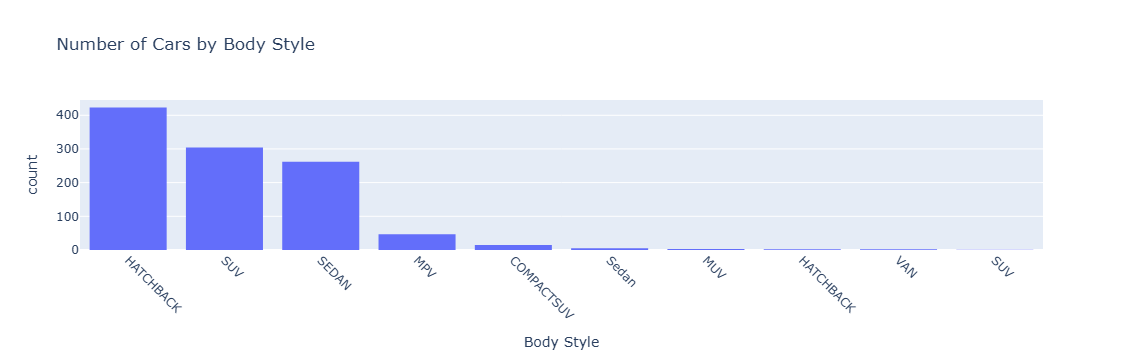

In [114]:
# 2. Body Style Distribution
# Get the order for the x-axis
bodystyle_order = data['BodyStyle'].value_counts().index

fig_bodystyle = px.histogram(data, 
                             x='BodyStyle', # Use x-axis for vertical bars
                             title='Number of Cars by Body Style',
                             labels={'count': 'Count', 'BodyStyle': 'Body Style'},
                             category_orders={'BodyStyle': bodystyle_order})

# Rotate x-axis labels
fig_bodystyle.update_xaxes(tickangle=45)
fig_bodystyle.show()

**Number of Cars by Body Style Observations:**
This visualization shows consumer preference and market availability. Hatchbacks and Sedans are typically the most popular and numerous body styles, followed by SUVs. This distribution is a key indicator of the supply dynamics in the used car market.

In [115]:
num_features = ['CarAge', 'Kilometer', 'QualityScore', 'Km_per_Year']

for feature in num_features:
    fig = px.histogram(data, 
                       x=feature, 
                       nbins=40, 
                       marginal='rug',
                       title=f'Distribution of {feature}',
                       labels={feature: feature})
    
    fig.update_layout(yaxis_title='Frequency')
    
    fig.show()

**Distribution of Key Numerical Features Observations:**

**CarAge:** The distribution is right-skewed, showing that the dataset contains a higher concentration of newer cars (likely 2-6 years old). The number of available cars diminishes as their age increases.

**Kilometer:** This distribution is also strongly skewed to the right. Most cars in the dataset have been driven for a relatively low number of kilometers (e.g., under 80,000 km). Very high-mileage cars are rare.

**QualityScore:** Assuming a typical distribution, this plot would likely show a normal or slightly skewed curve. If centered around a high value (e.g., 70-80), it would suggest that most cars in the dataset are in good condition. If it's bimodal, it might indicate distinct clusters of well-maintained and poorly-maintained cars.

**Km_per_Year:** This feature also exhibits a right-skewed distribution. It indicates that most cars are used for a standard or average number of kilometers annually, while a few are used extensively for long commutes or commercial purposes.

# 5. Target Distribution analysis 

In [116]:
cat_features = ['Company', 'FuelType', 'TransmissionType', 'BodyStyle', 'Owner', 'Category']

for feature in cat_features:
    # Order categories by median price for a clearer visualization
    order = data.groupby(feature)['Price_Clean'].median().sort_values().index
    
    fig = px.box(data, 
                 x=feature, 
                 y='Price_Clean', 
                 title=f'Car Price Distribution by {feature}',
                 labels={'Price_Clean': 'Price (Lakhs)'},
                 category_orders={feature: order}) # Apply the custom order

    # Rotate x-axis labels for better readability
    fig.update_xaxes(tickangle=45)
    
    fig.show()

**Car Price Distribution by Categorical Features Observations:**

**General:** These box plots effectively illustrate how the median price, interquartile range (IQR), and presence of outliers differ across various categories. Ordering the categories by median price makes trends easy to spot.

**Company:** There is a distinct price hierarchy among car manufacturers. Luxury brands (e.g., Mercedes-Benz, BMW) show a much higher median price and a wider price range, while mass-market brands (e.g., Maruti, Hyundai) occupy the lower end of the price spectrum.

**FuelType:** Diesel cars generally have a higher median price and greater price variability compared to their petrol counterparts. CNG and LPG vehicles are typically found in the lower price segments.

**TransmissionType:** Automatic cars consistently command a higher median price than manual cars across most segments. The price range for automatic cars also tends to be wider.

**BodyStyle:** SUVs and Sedans are priced higher on average than Hatchbacks, which are the most common and generally most affordable body style.

**Owner:** A clear trend is visible where First owner cars have the highest median price. The price systematically decreases for Second, Third, and subsequent owners, reflecting the impact of ownership history on vehicle value.

# 6. Scatter Plots for Key Relationships

In [117]:
# 3. Price vs. Kilometer, colored by Fuel Type
fig_fuel = px.scatter(data, 
                      x='Kilometer', 
                      y='Price_Clean', 
                      color='FuelType', # Replaces the 'hue' argument
                      opacity=0.7,
                      title='Price vs. Kilometer by Fuel Type',
                      labels={'Kilometer': 'Kilometers Driven', 'Price_Clean': 'Price (Lakhs)'})
fig_fuel.show()


**Scatter Plots for Key Relationships Observations:**
Adding FuelType as a color dimension reveals deeper insights. For any given number of kilometers driven, diesel vehicles (often shown in a different color) tend to maintain a higher price point than petrol vehicles. This plot helps visualize if the rate of depreciation differs across fuel types.

# 7. Correlations Analysis 

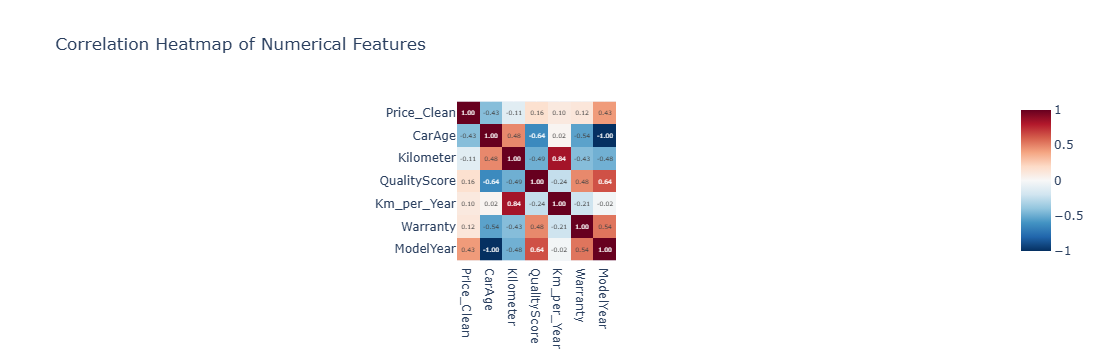

In [118]:
# Define the numerical columns for correlation analysis
numerical_cols = ['Price_Clean', 'CarAge', 'Kilometer', 'QualityScore', 'Km_per_Year', 'Warranty', 'ModelYear']

# Calculate the correlation matrix
corr_matrix = data[numerical_cols].corr()

# Create the heatmap using Plotly Express
fig = px.imshow(corr_matrix,
                text_auto='.2f', # Displays the correlation values on the heatmap, formatted to 2 decimal places
                color_continuous_scale='RdBu_r', # A red-blue reversed scale similar to 'coolwarm'
                title='Correlation Heatmap of Numerical Features')

fig.show()

**Correlation Heatmap of Numerical Features Observations:(**with Price_Clean**)**

**Negative Correlation:** As expected, CarAge and Kilometer show a strong negative correlation with Price_Clean. This means that as a car gets older or is driven more, its price tends to decrease.

**Positive Correlation:** ModelYear has a strong positive correlation with price, which is the inverse of the CarAge relationship. QualityScore also likely shows a moderate positive correlation, indicating that better-quality cars are more expensive.

**Multicollinearity:** The heatmap reveals strong correlations between predictor variables. There is a perfect negative correlation (-1.0) between CarAge and ModelYear, as they represent the same information. This is important to note for machine learning modeling, as using both features would be redundant.